# **Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.**
## **Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.**

In [1]:
# Import required packages
import pandas as pd
import numpy as np

# Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read csv data in panda dataframe
file_path='/content/drive/MyDrive/Almabetter/Telecom Churn.csv'
telecom_df=pd.read_csv(file_path)

**Understand More About The Data**

In [4]:
# shape of pandas dataframe
telecom_df.shape

(3333, 20)

In [5]:
# view first 5 rows of pandas dataframe
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# view last 5 rows of pandas dataframe
telecom_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
#To get all the columns names
print("Features of the Dataset:")
telecom_df.columns

Features of the Dataset:


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

# ***Breakdown our Features:***
***State:*** State name.

***Account length:*** Length of the Account.

***Area code:*** Code of that particular Area.

***Interenational plan:*** Yes indicates International plan is subscribed and No indicates not subscribed.

***Voice mail plan:*** Yes indicates Voice mail plan is subscribed and No indicates not subscribed.

***Number vmail messages:*** Number of vmail messages.

***Today day minutes:*** Total time spent today's day time in minutes.

***Total day calls:*** Total number of call made in the day time.

***Total day charge:*** Total charge to the customer in the day time.

***Total eve minutes:*** Total time spent in the evening in minutes.

***Total eve calls:*** Total number of calls made in the evening.

***Total eve charge:*** Total charge to the customer in the evening.

***Total night minutes:*** Total time spent in the night in minutes.

***Total night calls:*** Total number of night calls made by the customer.

***Total night charge:*** Total charge to the customer in the night.

***Total intl minutes:*** Total time spent for the international activity.

***Total intl calls:*** Total number of international calls made by the customer.

***Total intl charge:*** Total charge for international to the customer.

***Customer service calls:*** Number of customer service calls made by the customer.

***Churn:*** Customer Churn, True means churned customer, False means retained customer.

In [8]:
#Type of data present in all the columns
telecom_df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [9]:
#check details about the data set
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [10]:
#to check the unique values
telecom_df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [11]:
#To findout the description of the data set
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
#To looking for the description of the dataset to get more insights of the data
telecom_df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [13]:
#checking for the count of nan values in each column
telecom_df.isna().sum()


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [14]:
#To know the number customers subscribed and retained
telecom_df.Churn.value_counts()
#True represents no.of customers subscribers
#False represents no.of customers retained

False    2850
True      483
Name: Churn, dtype: int64

 As of now there are total 3333 rows and 20 columns 

 coming to data types:

There are four data types

1 is booean type data i.e; Churn

8 are float data type

3 are object data type

8 are integer data type


# As of now there are total 3333 rows and 20 columns

coming to data types:

There are four data types

1 is booean type data i.e; Churn

8 are float data type

3 are object data type

8 are integer data type

In [15]:
#checking duplicate values
len(telecom_df[telecom_df.duplicated()])

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


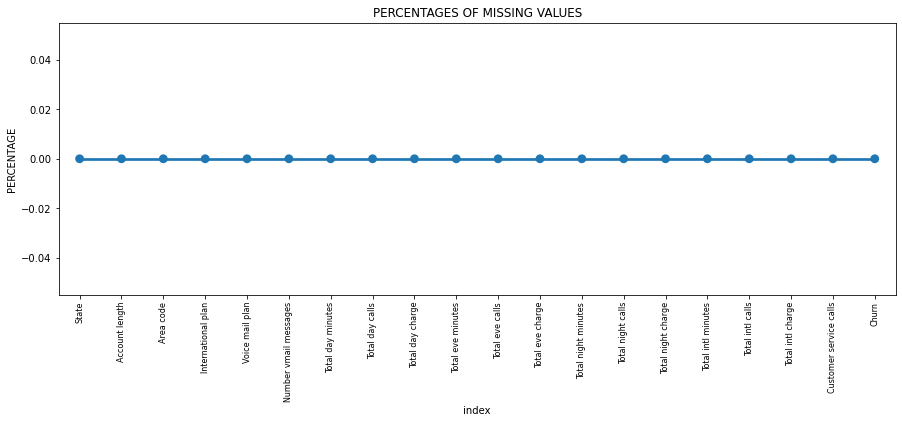

In [16]:
#To represent the missing nubers in percentage
missing=pd.DataFrame((telecom_df.isna().sum())*100 / telecom_df.shape[0]).reset_index()
plt.figure(figsize=(15,5))
ax =sns.pointplot('index',0,data= missing)
plt.xticks(rotation = 90, fontsize=8)
plt.title("PERCENTAGES OF MISSING VALUES")
plt.ylabel("PERCENTAGE")
plt.show()

# EXPLORATORY DATA ANALYSIS OF THE DATA SET

Analyzing What The Dependent Variables Said to us, i.e; Churn

In [17]:
#unique value in the churn
telecom_df['Churn'].unique()

array([False,  True])

In [18]:
telecom_df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Pie chart for CHURN')

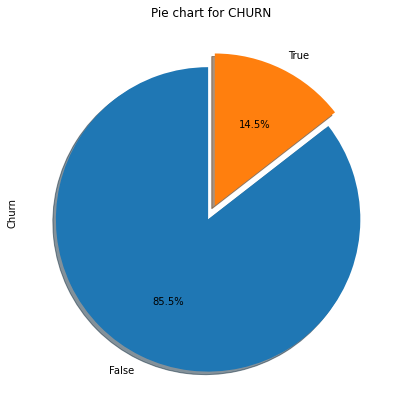

In [19]:
#To represent in the charts
telecom_df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', startangle=90,shadow=True,figsize=(7,7))
plt.title("Pie chart for CHURN")


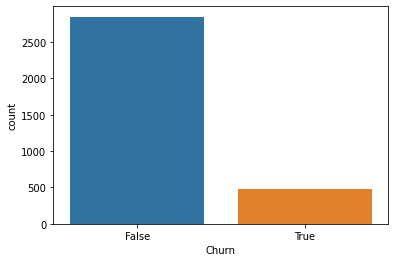

In [20]:
#To plot Churn in bar graph
sns.countplot(x=telecom_df.Churn)

Text(0.5, 1.0, 'Donut Plot For CHURN')

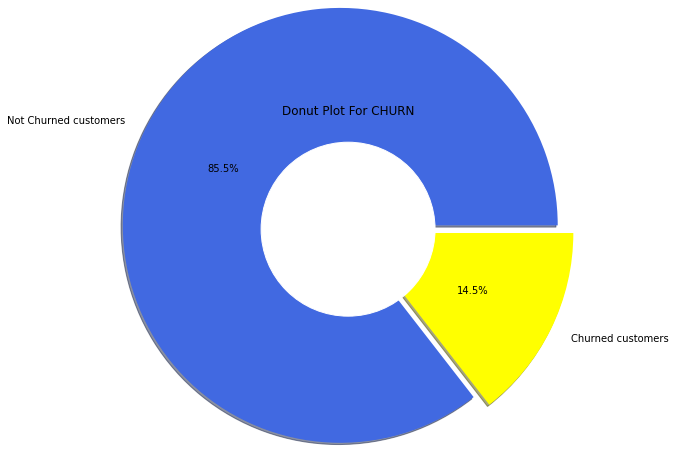

In [21]:
data=telecom_df['Churn'].value_counts()
explode=(0.1,0.1)
plt.pie(data,explode=explode,autopct='%1.1f%%', shadow=True, radius=2.5, colors=['royalblue','yellow'],labels=["Not Churned customers","Churned customers"])
p=plt.gcf()
circle=plt.Circle((0,0),1.0, color='white')
p.gca().add_artist(circle)
plt.title("Donut Plot For CHURN")


#***After analizing the Churn Column, I get 14.5% of customers had Churned.***

# Analysing State Column

In [22]:
#To know the number of unique values in 'State'
telecom_df['State'].nunique()

51

<function matplotlib.pyplot.show(*args, **kw)>

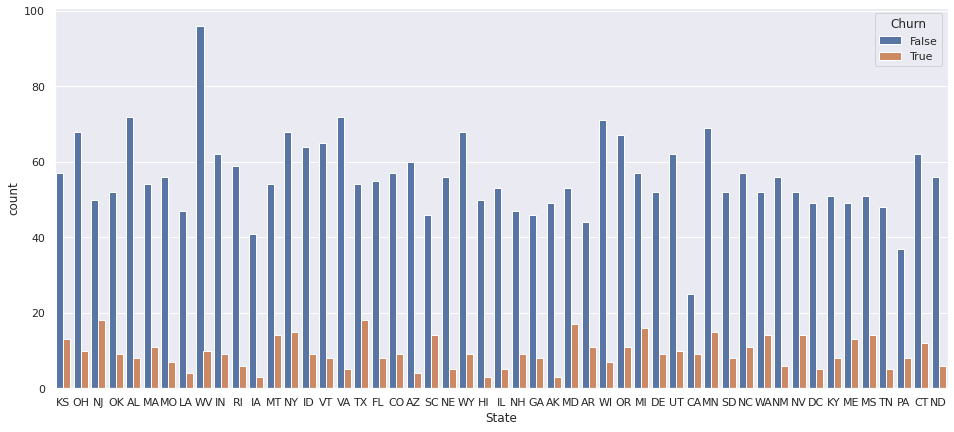

In [23]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(16,7))
ax=sns.countplot(x='State', hue='Churn',data=telecom_df)
plt.show

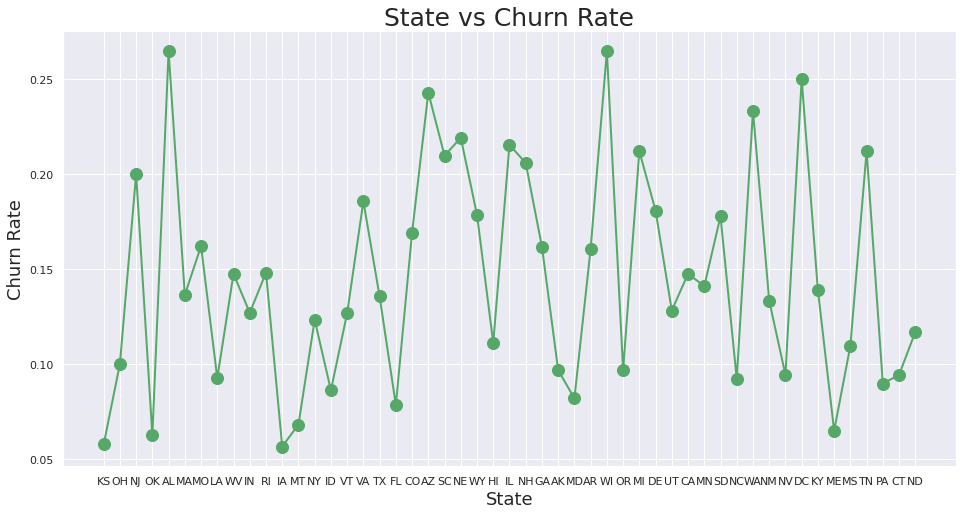

In [24]:
s1=telecom_df['State'].unique()
s2=telecom_df.groupby(['State'])['Churn'].mean()
plt.rcParams['figure.figsize']=(16,8)
plt.plot(s1, s2, color='g', marker='o', linewidth=2, markersize=12)
plt.title('State vs Churn Rate', fontsize=25)
plt.xlabel('State', fontsize=18)
plt.ylabel('Churn Rate', fontsize=18)
plt.show()

In [25]:
#To know the percentage State vs Churn
State_data=pd.crosstab(telecom_df['State'], telecom_df['Churn'])
State_data['Percentage_Churn']=State_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

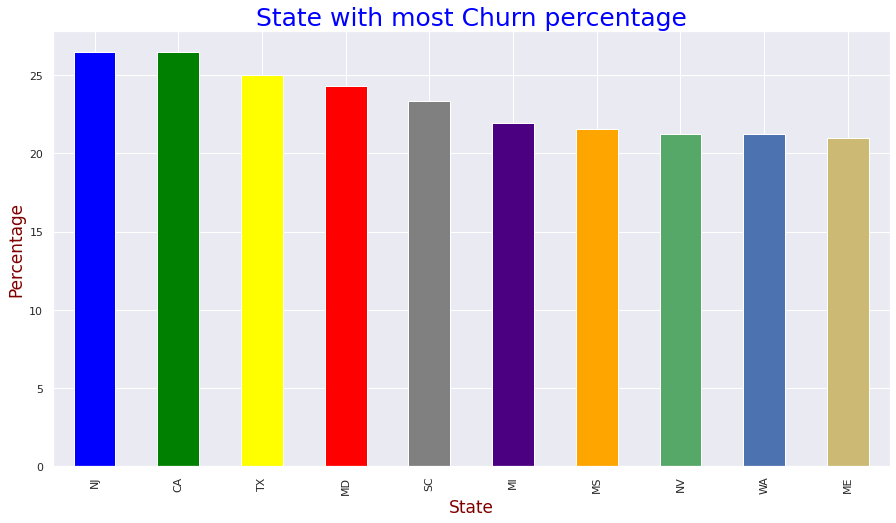

In [26]:
plt.rcParams['figure.figsize']=(15,8)
color=plt.cm.copper(np.linspace(0,0.5,25))
((telecom_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending=False).head(10).plot.bar(color=['blue','green','yellow','red','gray','indigo','orange','g','b','y'])
plt.title("State with most Churn percentage",color='blue', fontsize=25)
plt.xlabel("State", color='maroon',fontsize=17)
plt.ylabel("Percentage",color='maroon',fontsize=17)
plt.show()

In [27]:
#To know the Churn State of top 20 by the above list
telecom_df.groupby(['State'])['Churn'].mean().sort_values(ascending=False).head(20)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
Name: Churn, dtype: float64

# **There are 51 unique in state present who have different Churn percentage rate.**
# **From the above analysis NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,MT are the one who have higher churn rate more than 20.**
# **The reason for this Churn rate from particular State may be due to low because of low coverage of the cellular network at there areas.**

# Analyzing th "Area Code" Column

In [28]:
# Analysing the area code vs Churn Percentage
Area_code_data=pd.crosstab(telecom_df['Area code'], telecom_df["Churn"])
Area_code_data["Percentage_Churn"]=Area_code_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

Churn      False  True  Percentage_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


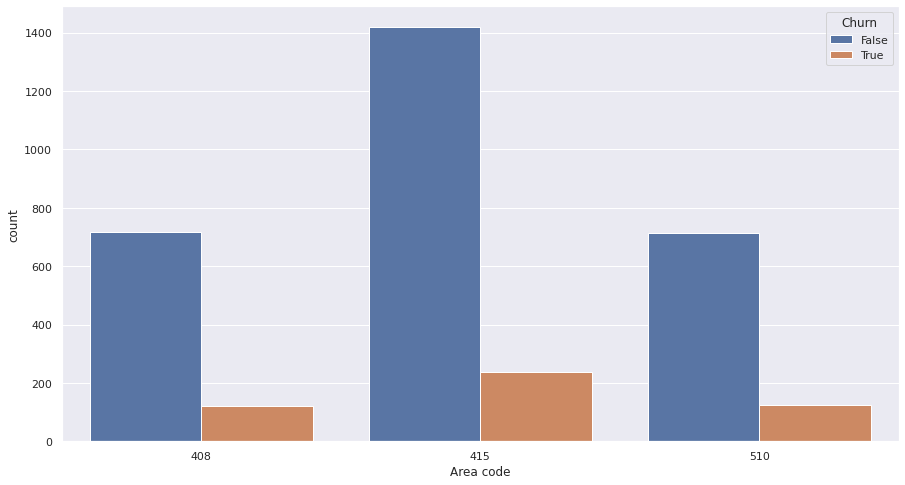

In [29]:
sns.set(style="darkgrid")
ax=sns.countplot(x="Area code", hue='Churn', data=telecom_df)
plt.show()

# ***In the above data, we noticed that there is only three unique values are there i.e., 408, 415 and 510. The Churn rate of these area codes are almost similar.***
# ***I don't think that there is any kind of relation between the "Area code" and "Churn" due to which customer leaves the operator.***

# Analysing the "International Plan" column

In [30]:
#show the count value of 'yes' and 'no'
telecom_df["International plan"].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [31]:
#show the unique data in International plan
telecom_df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
#To see the n unique data in International plan
telecom_df["International plan"].nunique()

2

In [33]:
#International plan vs Churn Percentage
International_plan_data=pd.crosstab(telecom_df["International plan"], telecom_df["Churn"])
International_plan_data["Percentage Churn"]=International_plan_data.apply(lambda x: x[1]*100/(x[0]+x[1]), axis=1)
International_plan_data

Churn,False,True,Percentage Churn
International plan,,,
No,2664,346,11.495017
Yes,186,137,42.414861


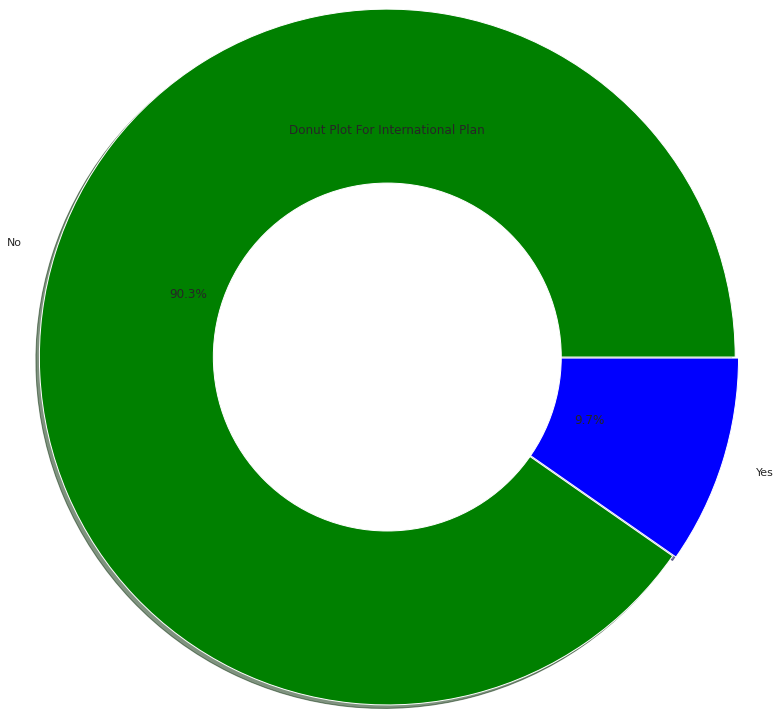

In [34]:
#To plot the International plan in Donut
data=telecom_df["International plan"].value_counts()
explode=(0,0.02)
plt.pie(data,explode=explode,autopct="%1.1f%%",shadow=True,radius=2.0,labels=["No","Yes"],colors=['Green','Blue'])
p=plt.gcf()
circle=plt.Circle((0,0),1,color='white')
p.gca().add_artist(circle)
plt.title("Donut Plot For International Plan")
plt.show()

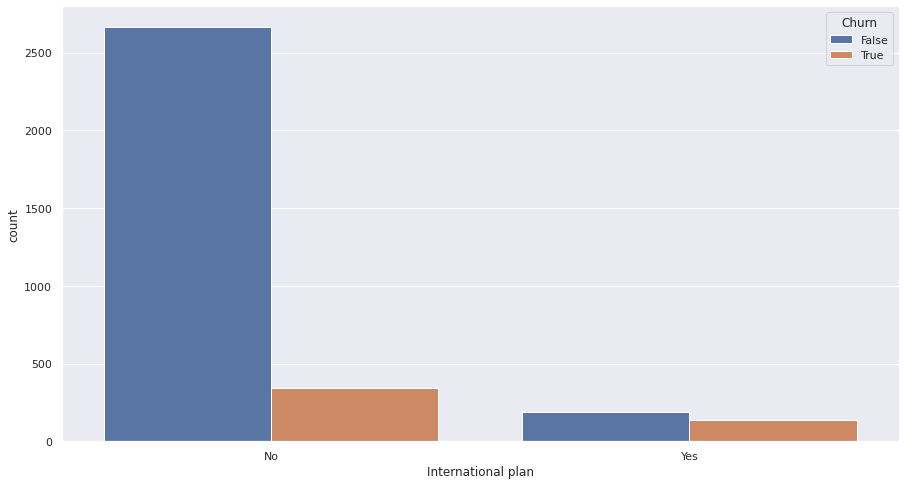

In [35]:
#Analysing by using countplot
sns.countplot(x="International plan", hue="Churn", data=telecom_df)

# ***From the above data we get***
# ***There are 3010 customers who don't have subscription to International plan.***
# ***There are 323 customers who have International Plan.***
# ***Among those who have a International Plan 42.4% people churn.***
# ***Where as among those who don't have a International plan only 11.4% people churn.***
# ***So basically the people who bought International plans are churning in big numbers.***
# ***Probably because of connectivity issues or high call charge.***

# Analyzing "Account Length" column

In [36]:
# Dividing the Churn and Non-Churn customers
churn_df=telecom_df[telecom_df['Churn']== bool(True)]
non_churn_df=telecom_df[telecom_df['Churn']==bool(False)]
#To see the churn customers
print(churn_df)
#To see the Non-churn customers
print(non_churn_df)

     State  Account length  Area code International plan Voice mail plan  \
10      IN              65        415                 No              No   
15      NY             161        415                 No              No   
21      CO              77        408                 No              No   
33      AZ              12        408                 No              No   
41      MD             135        408                Yes             Yes   
...    ...             ...        ...                ...             ...   
3301    CA              84        415                 No              No   
3304    IL              71        510                Yes              No   
3320    GA             122        510                Yes              No   
3322    MD              62        408                 No              No   
3323    IN             117        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
10                  

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


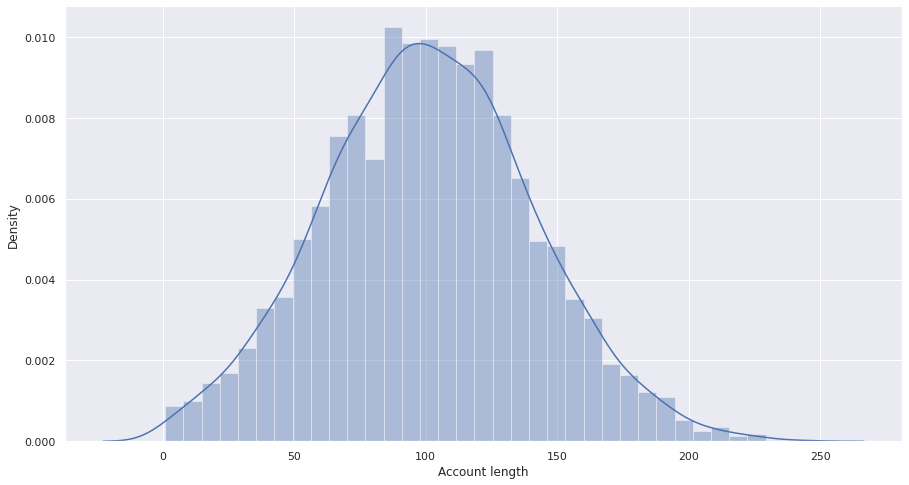

In [37]:
#Account length vs churn
sns.distplot(telecom_df['Account length'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

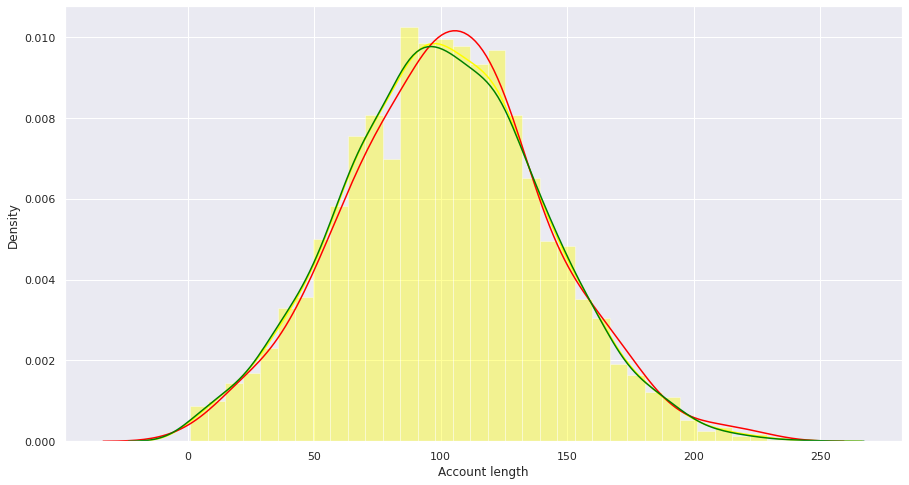

In [38]:
#comparision of churn account length and non-churn account length
sns.distplot(telecom_df['Account length'], color='yellow', label="All")
sns.distplot(churn_df['Account length'], color="red", hist=False, label="Churned")
sns.distplot(non_churn_df['Account length'], color="green",hist=False, label="Not Churned")
plt.show()

# **After analyzing various aspects of the "Account length" column I didn't found any relation to the Churn.**

# Analyzing "Voice Mail Plan" column

In [39]:
# show the unique values of the "Voice Mail Plan" column
telecom_df["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

In [40]:
# To know the voice mail plan vs churn
voice_mail_plan_data=pd.crosstab(telecom_df["Voice mail plan"], telecom_df["Churn"])
voice_mail_plan_data['Percentage Churn']=voice_mail_plan_data.apply(lambda x: x[1]*100/(x[0]+x[1]), axis=1)
print(voice_mail_plan_data)

Churn            False  True  Percentage Churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


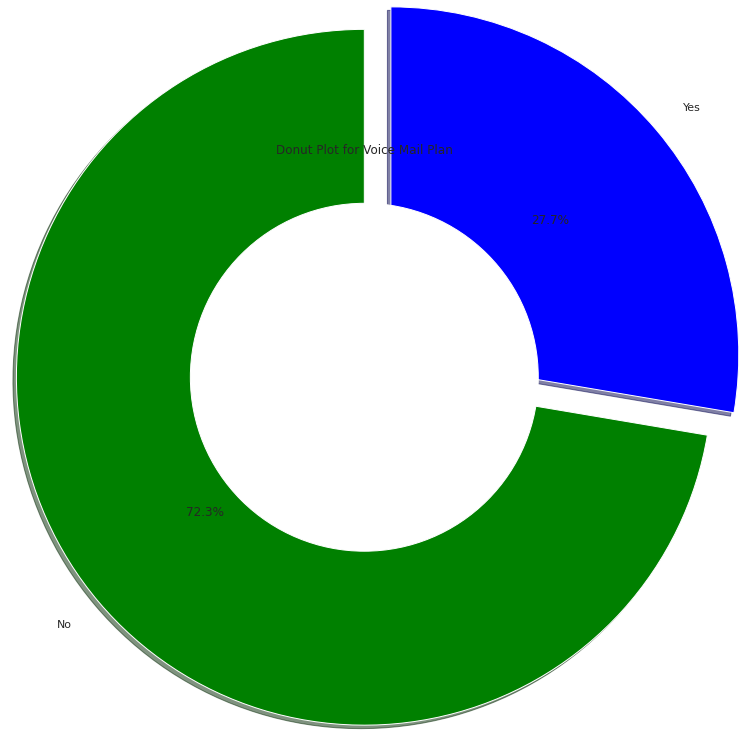

In [41]:
# To plot the voice mail plan for analysis into donut plot
data=telecom_df["Voice mail plan"].value_counts()
explode=(0,0.2)
plt.pie(data,explode=explode, autopct='%1.1f%%',startangle=90, shadow=True, radius=2.0, labels=["No","Yes"], colors=["green","blue"])
circle=plt.Circle((0,0),1,color="white")
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Donut Plot for Voice Mail Plan")
plt.show()

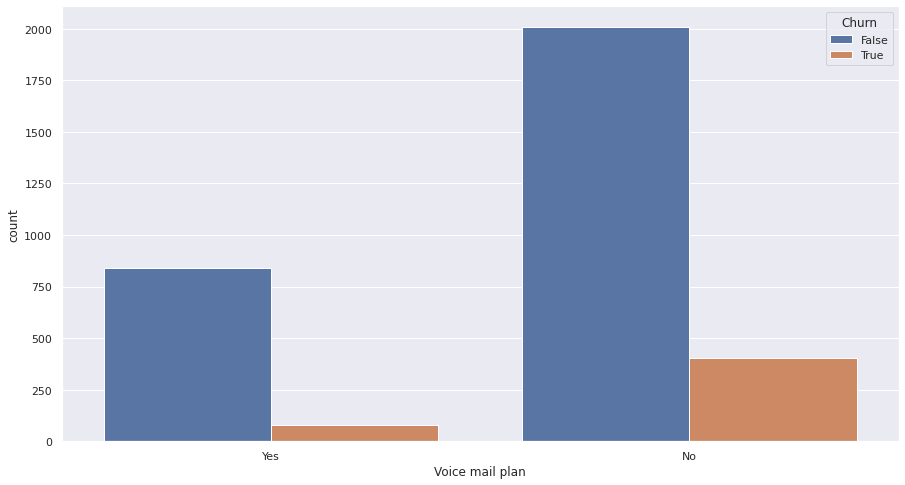

In [42]:
# Count plot of Voice Mail Plan
sns.countplot(x="Voice mail plan", hue="Churn", data=telecom_df)

# ***From the above analysis I didn't found any relation between "Voice Mail Plan" and "Churn"***

# Analyzing the "Customer service calls" column


In [43]:
# To see the unique in customer service calls
telecom_df['Customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [44]:
# To see the data in customer service calls
telecom_df["Customer service calls"].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [45]:
# To find the Churn vs Customer service calls
customer_service_calls_data=pd.crosstab(telecom_df['Customer service calls'], telecom_df["Churn"])
customer_service_calls_data["Percentage Churn"]=customer_service_calls_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(customer_service_calls_data)

Churn                   False  True  Percentage Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


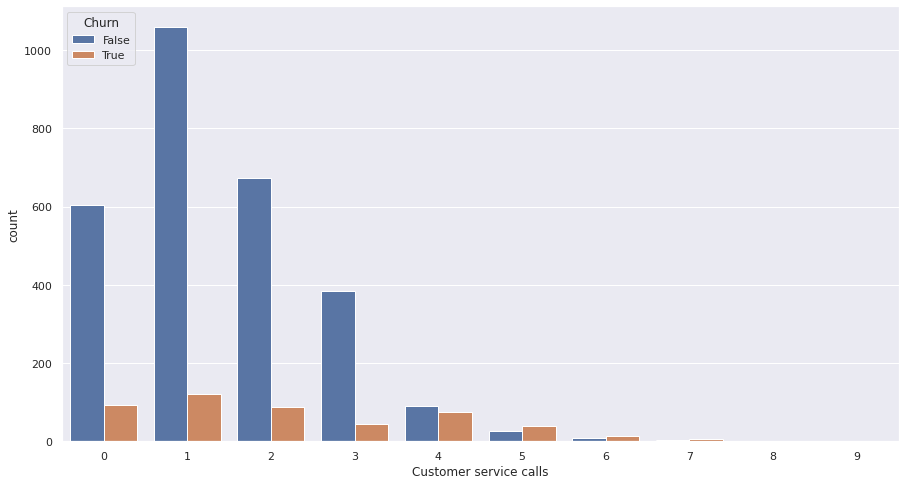

In [46]:
#plot the customer service calls
sns.countplot(x="Customer service calls",hue="Churn",data=telecom_df)

# **From the above analysis I found that, due to bad customer service, people tend to leave the operator.**

# Analyzing the "Number vmail messages" column

In [47]:
# To see the unique values in Number vmail messages column
telecom_df["Number vmail messages"].unique() 

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [48]:
# To see the describe to the Number vmail messaes column
telecom_df["Number vmail messages"].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

In [49]:
# To print the number values in Number vmail messages column
telecom_df["Number vmail messages"].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number vmail messages, dtype: int64

In [50]:
# To find the Number vmail messages vs churn
number_vmail_messages_data=pd.crosstab(telecom_df["Number vmail messages"],telecom_df["Churn"])
number_vmail_messages_data["Percentage Churn"]=number_vmail_messages_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(number_vmail_messages_data)

Churn                  False  True  Percentage Churn
Number vmail messages                               
0                       2008   403         16.715056
4                          1     0          0.000000
8                          2     0          0.000000
9                          2     0          0.000000
10                         1     0          0.000000
11                         2     0          0.000000
12                         6     0          0.000000
13                         4     0          0.000000
14                         7     0          0.000000
15                         8     1         11.111111
16                        12     1          7.692308
17                        13     1          7.142857
18                         5     2         28.571429
19                        18     1          5.263158
20                        20     2          9.090909
21                        26     2          7.142857
22                        30     2          6.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

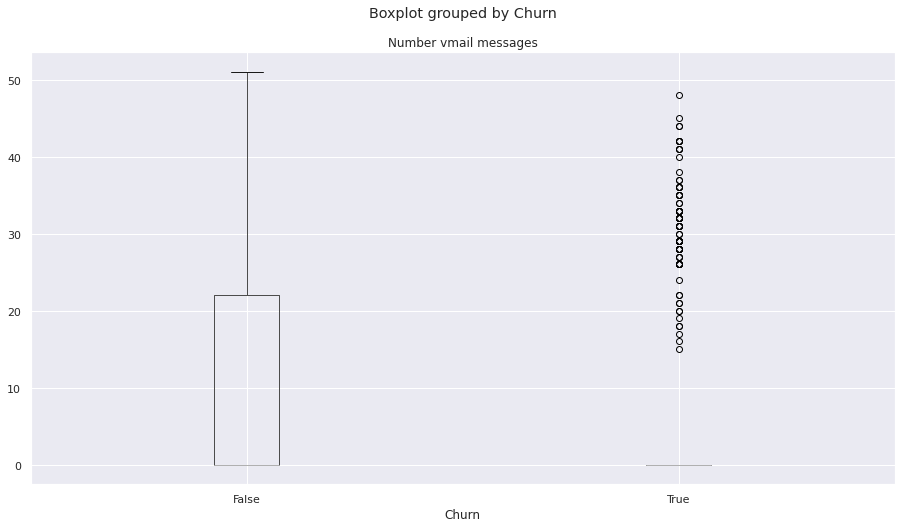

In [51]:
# To plot the Number vmail messages vs Churn in box plot
fig= plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Number vmail messages", by="Churn")
fig.suptitle("Number vmail messages", fontsize=15, fontweight="bold")
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


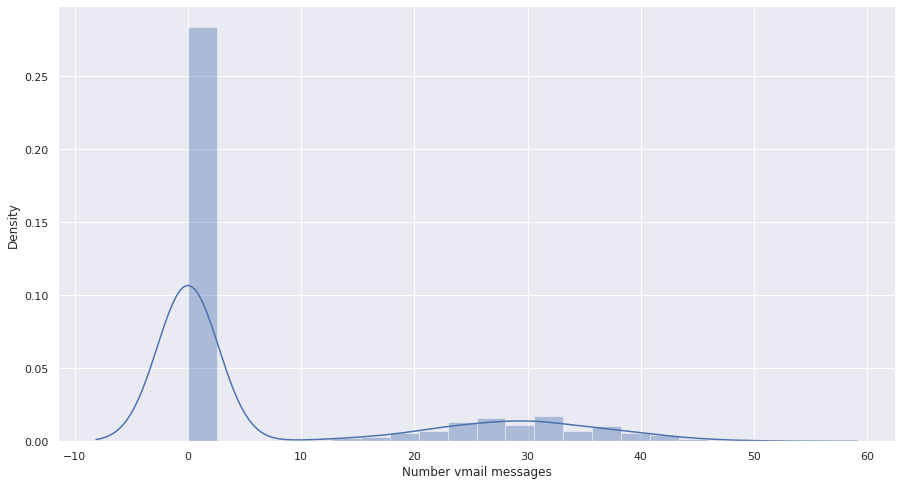

In [52]:
# To plot the Number vmail messages into distplot
sns.distplot(telecom_df["Number vmail messages"])

# ***After analyzing the "Number vmail messages" I found that there are more than twenty voice mail messages. so, there is churn. for that I have to improve voice quality.***

# Analayzing "Total Day calls" column

In [53]:
#To see the unique values in Total day calls column
telecom_df["Total day calls"].unique()

array([110, 123, 114,  71, 113,  98,  88,  79,  97,  84, 137, 127,  96,
        70,  67, 139,  66,  90, 117,  89, 112, 103,  86,  76, 115,  73,
       109,  95, 105, 121, 118,  94,  80, 128,  64, 106, 102,  85,  82,
        77, 120, 133, 135, 108,  57,  83, 129,  91,  92,  74,  93, 101,
       146,  72,  99, 104, 125,  61, 100,  87, 131,  65, 124, 119,  52,
        68, 107,  47, 116, 151, 126, 122, 111, 145,  78, 136, 140, 148,
        81,  55,  69, 158, 134, 130,  63,  53,  75, 141, 163,  59, 132,
       138,  54,  58,  62, 144, 143, 147,  36,  40, 150,  56,  51, 165,
        30,  48,  60,  42,   0,  45, 160, 149, 152, 142, 156,  35,  49,
       157,  44])

In [54]:
#To see the value counts in Total day calls
telecom_df['Total day calls'].value_counts()

102    78
105    75
95     69
107    69
104    68
       ..
149     1
163     1
30      1
165     1
36      1
Name: Total day calls, Length: 119, dtype: int64

In [55]:
#To see the Total day calls vs Churn rate
total_day_calls_data=pd.crosstab(telecom_df["Total day calls"], telecom_df["Churn"])
total_day_calls_data["Percentage Churn"]=total_day_calls_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(total_day_calls_data)

Churn            False  True  Percentage Churn
Total day calls                               
0                    1     1              50.0
30                   1     0               0.0
35                   1     0               0.0
36                   1     0               0.0
40                   2     0               0.0
...                ...   ...               ...
157                  1     0               0.0
158                  3     0               0.0
160                  1     0               0.0
163                  1     0               0.0
165                  0     1             100.0

[119 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

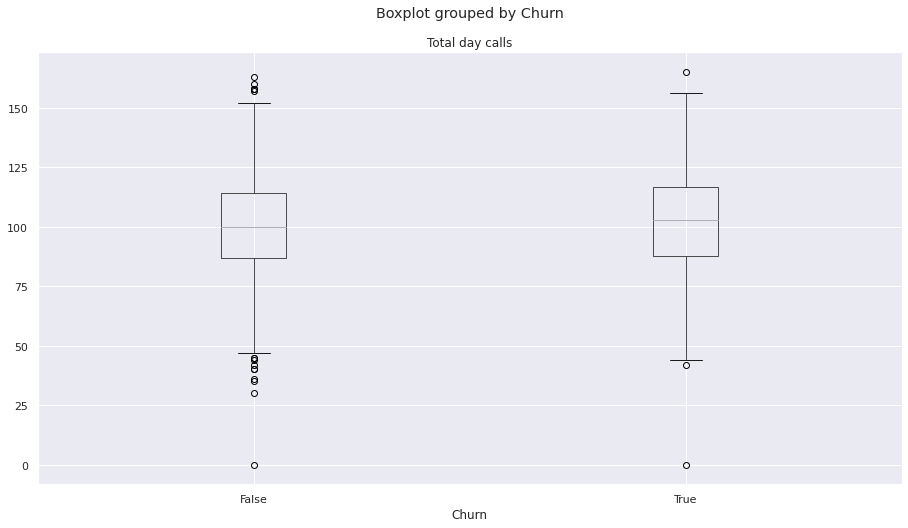

In [56]:
# To plot Total day calls vs churn in box plot
fig= plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Total day calls", by="Churn")
fig.suptitle("Total day calls", fontsize=15, fontweight="bold")
plt.plot()

# Analyzing the "Total Day Minutes" column

In [57]:
#To see the unique in "Total day minutes" column
telecom_df["Total day minutes"].unique()

array([265.1, 161.6, 243.4, ..., 321.1, 231.1, 180.8])

In [58]:
#To see the value counts in Total day minutes
telecom_df["Total day minutes"].value_counts()

154.0    8
159.5    8
174.5    8
183.4    7
175.4    7
        ..
78.6     1
200.9    1
254.3    1
247.0    1
180.8    1
Name: Total day minutes, Length: 1667, dtype: int64

In [59]:
# To see the Today day minutes vs churn
total_day_minutes_data=pd.crosstab(telecom_df["Total day minutes"], telecom_df["Churn"])
total_day_minutes_data["Percentage Churn"]=total_day_minutes_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(total_day_minutes_data)

Churn              False  True  Percentage Churn
Total day minutes                               
0.0                    1     1              50.0
2.6                    1     0               0.0
7.8                    1     0               0.0
7.9                    1     0               0.0
12.5                   1     0               0.0
...                  ...   ...               ...
335.5                  0     1             100.0
337.4                  0     1             100.0
345.3                  0     1             100.0
346.8                  0     1             100.0
350.8                  0     1             100.0

[1667 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

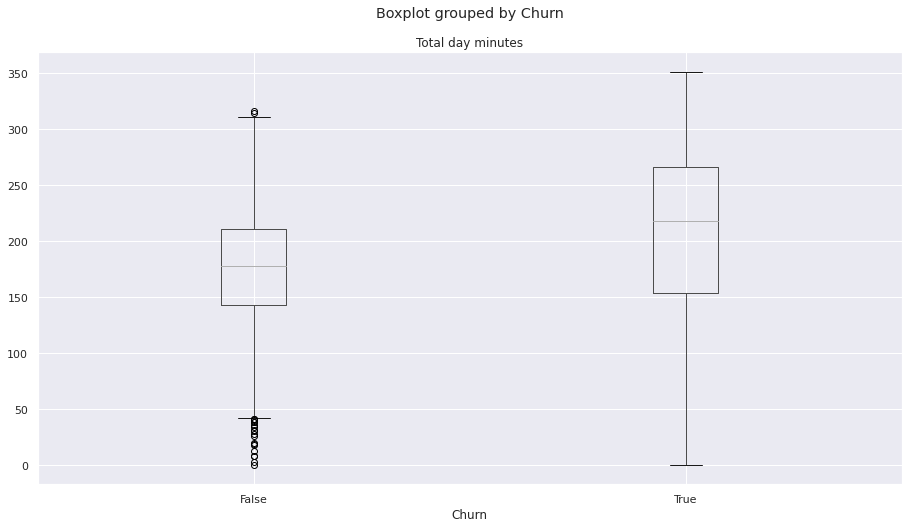

In [60]:
#To plot the Total day minutes vs Churn in boxplot
fig= plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Total day minutes", by="Churn")
fig.suptitle("Total day minutes", fontsize=15, fontweight="bold")
plt.plot()

# Analyzing the "Total Day Charge" column

In [61]:
#To see unique in "Total day charge" column
telecom_df["Total day charge"].unique()

array([45.07, 27.47, 41.38, ..., 54.59, 39.29, 30.74])

In [62]:
#To see value counts in "Total day charges"
telecom_df["Total day charge"].value_counts()

26.18    8
27.12    8
29.67    8
31.18    7
29.82    7
        ..
13.36    1
34.15    1
43.23    1
41.99    1
30.74    1
Name: Total day charge, Length: 1667, dtype: int64

In [63]:
#To plot the Total Day Charge vs Churn
total_day_charge_data=pd.crosstab(telecom_df["Total day charge"], telecom_df["Churn"])
total_day_charge_data["Percentage Churn"]=total_day_charge_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(total_day_charge_data)

Churn             False  True  Percentage Churn
Total day charge                               
0.00                  1     1              50.0
0.44                  1     0               0.0
1.33                  1     0               0.0
1.34                  1     0               0.0
2.13                  1     0               0.0
...                 ...   ...               ...
57.04                 0     1             100.0
57.36                 0     1             100.0
58.70                 0     1             100.0
58.96                 0     1             100.0
59.64                 0     1             100.0

[1667 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

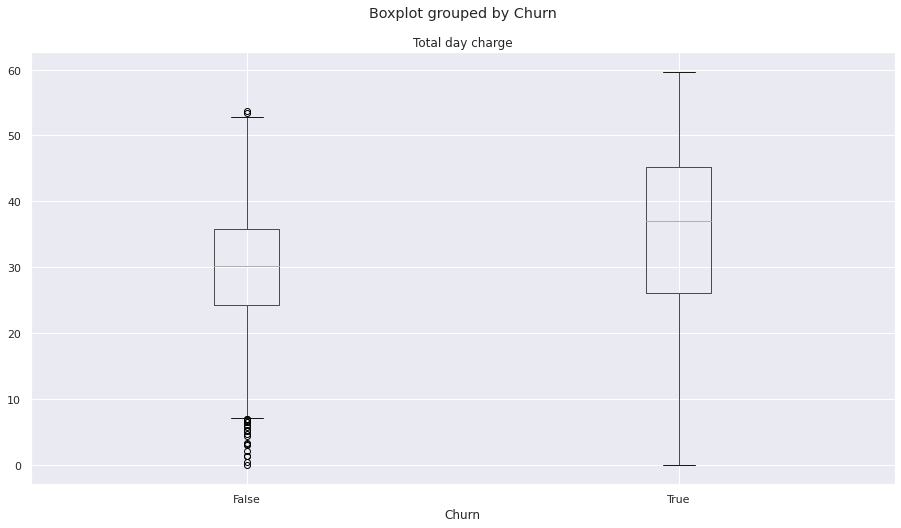

In [64]:
#To plot the total day charge vs churn
fig= plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Total day charge", by="Churn")
fig.suptitle("Total day charge", fontsize=15, fontweight="bold")
plt.plot()

# Analyzing the "Total Evening Calls" column

In [65]:
#To see the unique in "Total evening calls" column
print(telecom_df["Total eve calls"].unique())

#To see the valu counts in Total eve calls 
print(telecom_df["Total eve calls"].value_counts())


[ 99 103 110  88 122 101 108  94  80 111  83 148  71  75  76  97  90  65
  93 121 102  72 112 100  84 109  63 107 115 119 116  92  85  98 118  74
 117  58  96  66  67  62  77 164 126 142  64 104  79  95  86 105  81 113
 106  59  48  82  87 123 114 140 128  60  78 125  91  46 138 129  89 133
 136  57 135 139  51  70 151 137 134  73 152 168  68 120  69 127 132 143
  61 124  42  54 131  52 149  56  37 130  49 146 147  55  12  50 157 155
  45 144  36 156  53 141  44 153 154 150  43   0 145 159 170]
105    80
94     79
108    71
102    70
97     70
       ..
49      1
37      1
164     1
42      1
170     1
Name: Total eve calls, Length: 123, dtype: int64


In [66]:
#To find the data in Total eve calls
total_eve_calls_data=pd.crosstab(telecom_df["Total eve calls"],telecom_df["Churn"])
total_eve_calls_data["Percentage Churn"]=total_eve_calls_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(total_eve_calls_data)

Churn            False  True  Percentage Churn
Total eve calls                               
0                    1     0               0.0
12                   1     0               0.0
36                   1     0               0.0
37                   1     0               0.0
42                   1     0               0.0
...                ...   ...               ...
157                  1     0               0.0
159                  0     1             100.0
164                  1     0               0.0
168                  0     1             100.0
170                  1     0               0.0

[123 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

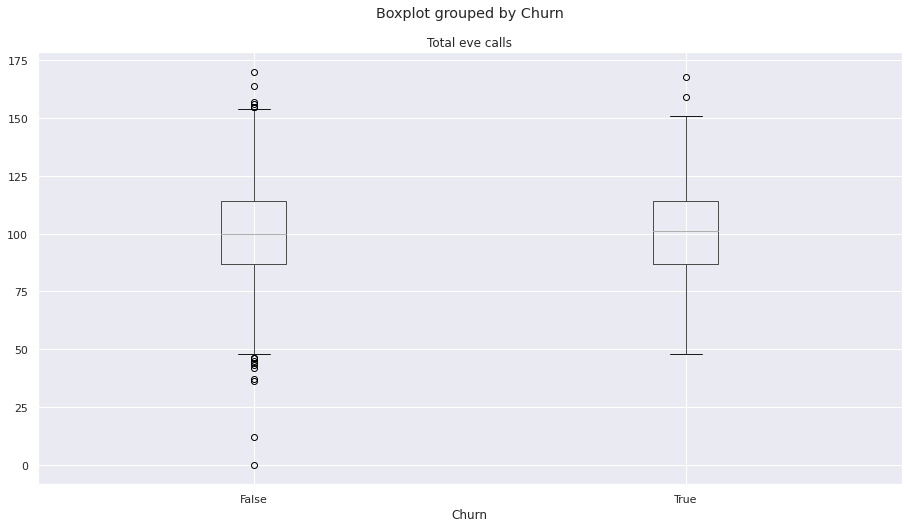

In [67]:
# To plot Total eve calls vs Churn into boxplot
fig=plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Total eve calls", by="Churn")
fig.suptitle("Total eve calls",fontsize=15,fontweight="bold")
plt.plot()

# Analyzing the "Total eve minutes" column

In [68]:
# To see the unique in Total eve minutes column
telecom_df["Total eve minutes"].unique()

array([197.4, 195.5, 121.2, ..., 153.4, 288.8, 265.9])

In [70]:
# To see the value counts in Total eve minutes
telecom_df["Total eve minutes"].value_counts()

169.9    9
167.2    7
180.5    7
201.0    7
161.7    7
        ..
75.3     1
293.9    1
232.8    1
173.2    1
265.9    1
Name: Total eve minutes, Length: 1611, dtype: int64

In [71]:
# To find the Total eve minutes vs Churn rate
total_eve_minutes_data=pd.crosstab(telecom_df["Total eve minutes"], telecom_df["Churn"])
total_eve_minutes_data["Percentage Churn"]=total_eve_minutes_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(total_eve_minutes_data)

Churn              False  True  Percentage Churn
Total eve minutes                               
0.0                    1     0               0.0
31.2                   1     0               0.0
42.2                   1     0               0.0
42.5                   1     0               0.0
43.9                   1     0               0.0
...                  ...   ...               ...
350.9                  0     1             100.0
351.6                  1     0               0.0
354.2                  1     0               0.0
361.8                  1     0               0.0
363.7                  0     1             100.0

[1611 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

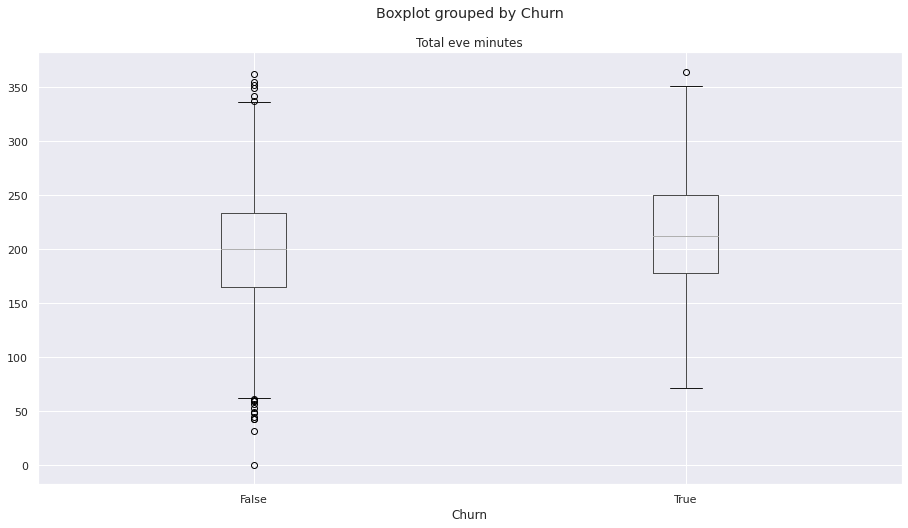

In [72]:
# To plot the Total eve minutes vs Churn in boxplot
fig=plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Total eve minutes", by="Churn")
fig.suptitle("Total eve minutes",fontsize=15, fontweight="bold")
plt.plot()

# Analyzing the "Total Evening Charge" column

In [73]:
# To See the unique values in "Total eve charge" column
telecom_df["Total eve charge"].unique()

array([16.78, 16.62, 10.3 , ..., 13.04, 24.55, 22.6 ])

In [74]:
# To see the value counts in the "Total eve charge" column
telecom_df["Total eve charge"].value_counts()

14.25    11
16.12    11
15.90    10
17.09     9
18.62     9
         ..
7.85      1
8.63      1
26.54     1
6.74      1
22.60     1
Name: Total eve charge, Length: 1440, dtype: int64

In [75]:
# To find the data in "Total eve charge" vs "Churn"
total_eve_charge_data=pd.crosstab(telecom_df["Total eve charge"], telecom_df["Churn"])
total_eve_charge_data["Percentage Churn"]=total_eve_charge_data.apply(lambda x: x[1]*100/(x[0]+x[1]), axis=1)
print(total_eve_charge_data)

Churn             False  True  Percentage Churn
Total eve charge                               
0.00                  1     0               0.0
2.65                  1     0               0.0
3.59                  1     0               0.0
3.61                  1     0               0.0
3.73                  1     0               0.0
...                 ...   ...               ...
29.83                 0     1             100.0
29.89                 1     0               0.0
30.11                 1     0               0.0
30.75                 1     0               0.0
30.91                 0     1             100.0

[1440 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

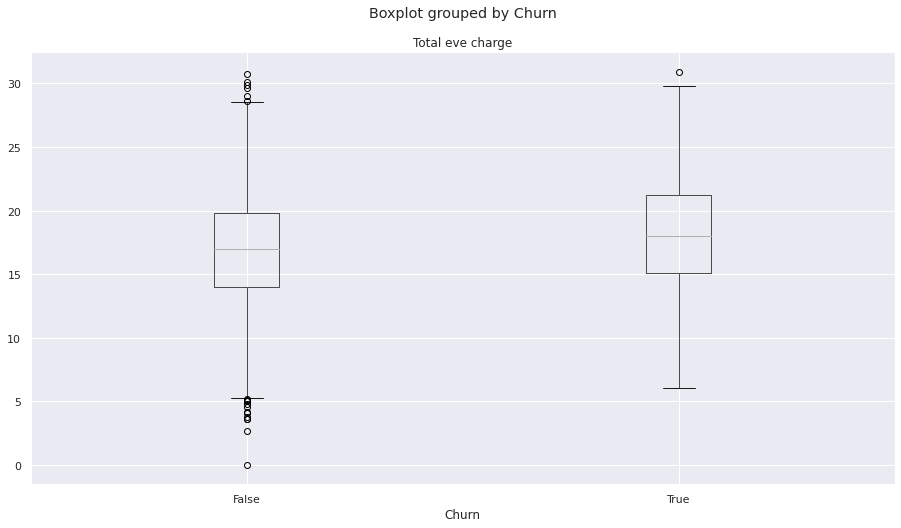

In [76]:
# To plot Total eve charge vs Churn in boxplot
fig=plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Total eve charge", by="Churn")
fig.suptitle("Total evening chrage", fontsize=15, fontweight="bold")
plt.plot()

# Analyzing the "Total night calls" column


In [77]:
# To See the unique in "Total night calls"
telecom_df["Total night calls"].unique()

array([ 91, 103, 104,  89, 121, 118,  96,  90,  97, 111,  94, 128, 115,
        99,  75, 108,  74, 133,  64,  78, 105,  68, 102, 148,  98, 116,
        71, 109, 107, 135,  92,  86, 127,  79,  87, 129,  57,  77,  95,
        54, 106,  53,  67, 139,  60, 100,  61,  73, 113,  76, 119,  88,
        84,  62, 137,  72, 142, 114, 126, 122,  81, 123, 117,  82,  80,
       120, 130, 134,  59, 112, 132, 110, 101, 150,  69, 131,  83,  93,
       124, 136, 125,  66, 143,  58,  55,  85,  56,  70,  46,  42, 152,
        44, 145,  50, 153,  49, 175,  63, 138, 154, 140, 141, 146,  65,
        51, 151, 158, 155, 157, 147, 144, 149, 166,  52,  33, 156,  38,
        36,  48, 164])

In [78]:
# To see the value counts in "Total night calls"
telecom_df["Total night calls"].value_counts()

105    84
104    78
91     76
102    72
100    69
       ..
149     1
158     1
44      1
46      1
164     1
Name: Total night calls, Length: 120, dtype: int64

In [79]:
# To find the data in "Total night calls" vs "Churn"
total_night_calls_data=pd.crosstab(telecom_df["Total night calls"], telecom_df["Churn"])
total_night_calls_data["Percentage Churn"]=total_night_calls_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(total_night_calls_data)

Churn              False  True  Percentage Churn
Total night calls                               
33                     1     0               0.0
36                     1     0               0.0
38                     1     0               0.0
42                     2     0               0.0
44                     1     0               0.0
...                  ...   ...               ...
157                    2     0               0.0
158                    0     1             100.0
164                    1     0               0.0
166                    1     0               0.0
175                    1     0               0.0

[120 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

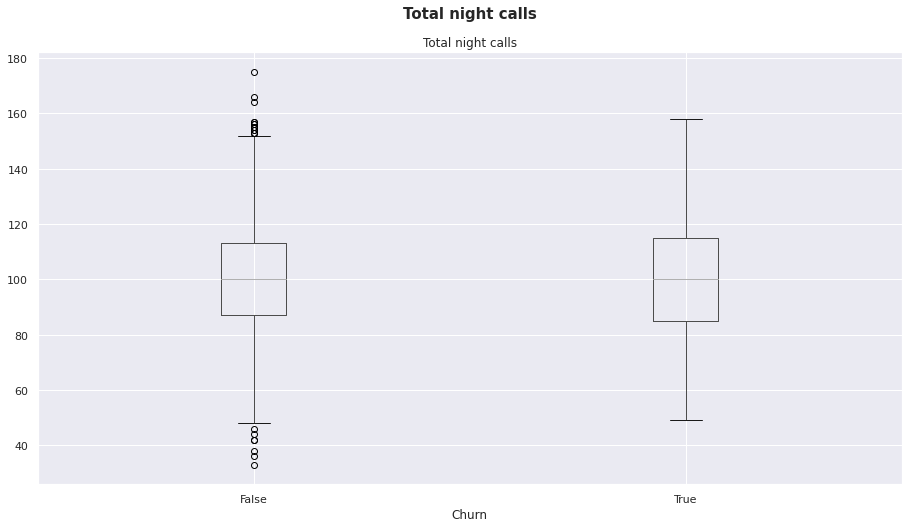

In [80]:
# To plot the "Total night calls" vs "Churn" in boxplot
fig=plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Total night calls", by="Churn")
plt.suptitle("Total night calls", fontsize=15, fontweight="bold")
plt.plot()

# Analyzing the "Total night minutes" column

In [81]:
# To see unique values "Total night minutes" column
telecom_df["Total night minutes"].unique()

array([244.7, 254.4, 162.6, ..., 280.9, 120.1, 279.1])

In [82]:
# To see the value counts in "Total night minutes" column
telecom_df["Total night minutes"].value_counts()

191.4    8
210.0    8
188.2    8
197.4    8
214.6    8
        ..
142.0    1
254.8    1
111.5    1
260.7    1
279.1    1
Name: Total night minutes, Length: 1591, dtype: int64

In [83]:
# To find data "Total night minutes" vs "Churn"
total_night_minutes_data=pd.crosstab(telecom_df["Total night minutes"], telecom_df["Churn"])
total_night_minutes_data["Percentage Churn"]=total_night_minutes_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(total_night_minutes_data)

Churn                False  True  Percentage Churn
Total night minutes                               
23.2                     1     0               0.0
43.7                     1     0               0.0
45.0                     1     0               0.0
47.4                     0     1             100.0
50.1                     2     0               0.0
...                    ...   ...               ...
364.9                    1     0               0.0
367.7                    1     0               0.0
377.5                    1     0               0.0
381.9                    1     0               0.0
395.0                    1     0               0.0

[1591 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

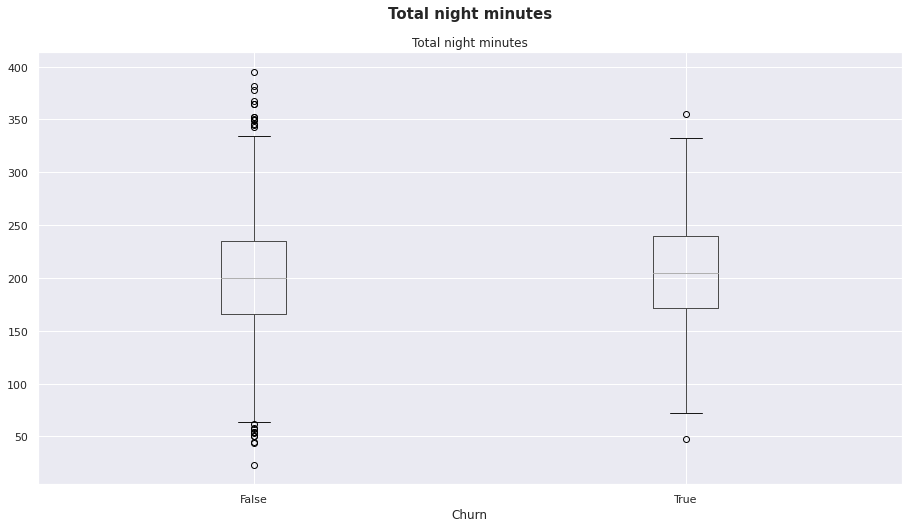

In [84]:
# To plot the "Total night minutes" vs "Churn" in boxplot
fig=plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Total night minutes", by="Churn")
plt.suptitle("Total night minutes", fontsize=15, fontweight="bold")
plt.plot()

# Analyzing "Total night charge" column

In [85]:
#To see unique in "Total night charge" column
telecom_df["Total night charge"].unique()

array([11.01, 11.45,  7.32,  8.86,  8.41,  9.18,  9.57,  9.53,  9.71,
       14.69,  9.4 ,  8.82,  6.35,  8.65,  9.14,  7.23,  4.02,  5.83,
        7.46,  8.68,  9.43,  8.18,  8.53, 10.67, 11.28,  8.22,  4.59,
        8.17,  8.04, 11.27, 11.08, 13.2 , 12.61,  9.61,  6.88,  5.82,
       10.25,  4.58,  8.47,  8.45,  5.5 , 14.02,  8.03, 11.94,  7.34,
        6.06, 10.9 ,  6.44,  3.18, 10.66, 11.21, 12.73, 10.28, 12.16,
        6.34,  8.15,  5.84,  8.52,  7.5 ,  7.48,  6.21, 11.95,  7.15,
        9.63,  7.1 ,  6.91,  6.69, 13.29, 11.46,  7.76,  6.86,  8.16,
       12.15,  7.79,  7.99, 10.29, 10.08, 12.53,  7.91, 10.02,  8.61,
       14.54,  8.21,  9.09,  4.93, 11.39, 11.88,  5.75,  7.83,  8.59,
        7.52, 12.38,  7.21,  5.81,  8.1 , 11.04, 11.19,  8.55,  8.42,
        9.76,  9.87, 10.86,  5.36, 10.03, 11.15,  9.51,  6.22,  2.59,
        7.65,  6.45,  9.  ,  6.4 ,  9.94,  5.08, 10.23, 11.36,  6.97,
       10.16,  7.88, 11.91,  6.61, 11.55, 11.76,  9.27,  9.29, 11.12,
       10.69,  8.8 ,

In [86]:
# To see the value counts "Total night charge" column
telecom_df["Total night charge"].value_counts()

9.66     15
9.45     15
8.47     14
8.88     14
7.69     13
         ..
15.97     1
14.46     1
14.03     1
3.20      1
10.53     1
Name: Total night charge, Length: 933, dtype: int64

In [87]:
#To find the "Total night charge" vs "Churn"
total_night_charge_data=pd.crosstab(telecom_df["Total night charge"], telecom_df["Churn"])
total_night_charge_data["Percentage Churn"]=total_night_charge_data.apply(lambda x: x[1]*100/(x[0]+x[1]), axis=1)
print(total_night_charge_data)

Churn               False  True  Percentage Churn
Total night charge                               
1.04                    1     0               0.0
1.97                    1     0               0.0
2.03                    1     0               0.0
2.13                    0     1             100.0
2.25                    2     0               0.0
...                   ...   ...               ...
16.42                   1     0               0.0
16.55                   1     0               0.0
16.99                   1     0               0.0
17.19                   1     0               0.0
17.77                   1     0               0.0

[933 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

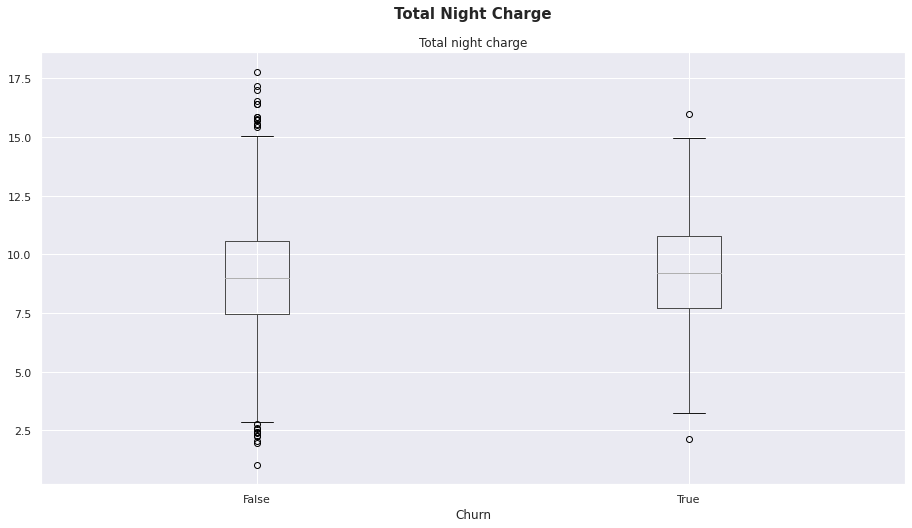

In [88]:
#To plot the "Total night charge" vs "Churn" in boxplot
fig=plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Total night charge",by="Churn")
plt.suptitle("Total Night Charge", fontsize=15, fontweight="bold")
plt.plot()

# Analyzing the "Total International Calls" column

In [89]:
#To see the unique "Total International Calls" column
telecom_df["Total intl calls"].unique()

array([ 3,  5,  7,  6,  4,  2,  9, 19,  1, 10, 15,  8, 11,  0, 12, 13, 18,
       14, 16, 20, 17])

In [90]:
#To see the value counts "Total intl calls" column
telecom_df["Total intl calls"].value_counts()

3     668
4     619
2     489
5     472
6     336
7     218
1     160
8     116
9     109
10     50
11     28
0      18
12     15
13     14
15      7
14      6
18      3
16      2
19      1
20      1
17      1
Name: Total intl calls, dtype: int64

In [91]:
#To find the data "Total intl calls" vs "Churn"
total_intl_calls_data=pd.crosstab(telecom_df["Total intl calls"], telecom_df["Churn"])
total_intl_calls_data["Percentage Churn"]=total_intl_calls_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(total_intl_calls_data)

Churn             False  True  Percentage Churn
Total intl calls                               
0                    18     0          0.000000
1                   129    31         19.375000
2                   381   108         22.085890
3                   570    98         14.670659
4                   540    79         12.762520
5                   419    53         11.228814
6                   293    43         12.797619
7                   191    27         12.385321
8                   105    11          9.482759
9                    95    14         12.844037
10                   42     8         16.000000
11                   24     4         14.285714
12                   14     1          6.666667
13                   13     1          7.142857
14                    5     1         16.666667
15                    4     3         42.857143
16                    2     0          0.000000
17                    1     0          0.000000
18                    3     0          0

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

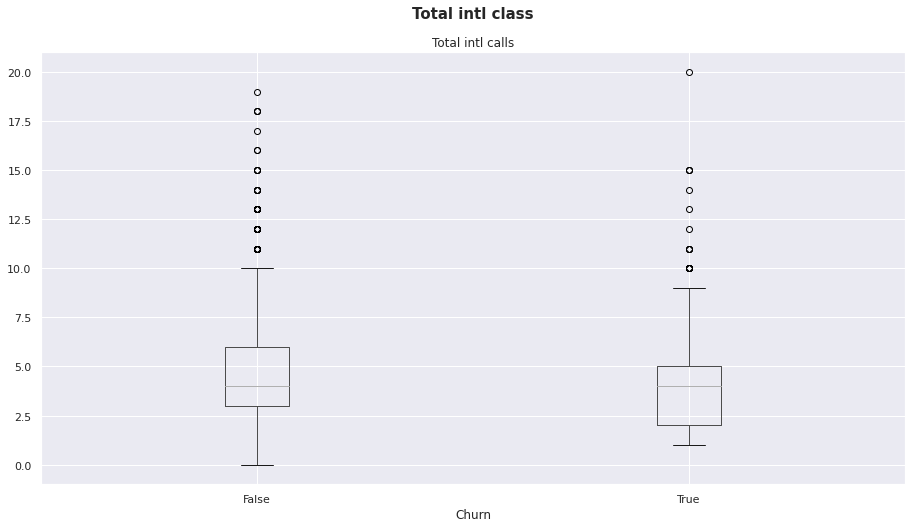

In [92]:
#To plot the "Total intl calls" vs "Churn" in boxplot
fig=plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Total intl calls",by="Churn")
plt.suptitle("Total intl class", fontsize=15, fontweight="bold")
plt.plot()

# Analyzing the "Total intl cahrge" column

In [93]:
# To see the unique in "Total intl charge" column
telecom_df["Total intl charge"].unique()

array([2.7 , 3.7 , 3.29, 1.78, 2.73, 1.7 , 2.03, 1.92, 2.35, 3.02, 3.43,
       2.46, 3.32, 3.54, 1.46, 3.73, 2.19, 3.51, 2.86, 1.54, 2.57, 2.08,
       2.78, 4.19, 3.97, 3.  , 3.83, 3.4 , 3.19, 2.24, 3.92, 2.84, 2.54,
       3.94, 2.48, 0.95, 2.3 , 3.56, 2.  , 2.38, 2.97, 2.11, 1.84, 3.08,
       2.51, 2.62, 2.75, 2.16, 1.57, 3.27, 3.24, 3.13, 2.21, 1.67, 1.97,
       1.65, 3.16, 4.05, 2.65, 3.35, 2.32, 2.94, 3.75, 2.4 , 2.13, 1.43,
       1.19, 3.38, 3.05, 2.43, 2.59, 3.59, 5.4 , 1.94, 1.73, 3.81, 3.86,
       1.86, 3.11, 4.27, 3.46, 4.37, 0.  , 3.21, 2.67, 2.27, 2.92, 3.62,
       2.89, 4.75, 1.27, 0.73, 3.65, 3.48, 3.89, 2.81, 1.81, 4.16, 1.22,
       1.76, 4.21, 1.59, 5.1 , 2.05, 1.35, 1.89, 3.78, 4.86, 4.32, 4.  ,
       1.  , 0.54, 1.3 , 4.13, 1.62, 3.67, 4.64, 4.73, 1.51, 4.91, 0.97,
       4.46, 1.24, 1.38, 1.11, 4.4 , 4.02, 4.43, 4.51, 0.35, 4.1 , 4.08,
       4.29, 1.49, 4.35, 1.08, 4.56, 1.4 , 1.13, 4.24, 4.59, 1.05, 1.03,
       0.59, 4.62, 1.32, 4.83, 4.67, 4.97, 4.81, 1.

In [94]:
#To see the value counts in "Total intl charge" column
telecom_df["Total intl charge"].value_counts()

2.70    62
3.05    59
2.65    56
2.94    56
2.73    53
        ..
0.73     1
5.10     1
4.64     1
0.35     1
0.68     1
Name: Total intl charge, Length: 162, dtype: int64

In [95]:
#To find the Data in "total intl charge" vs "Churn"
total_intl_charge_data=pd.crosstab(telecom_df["Total intl charge"], telecom_df["Churn"])
total_intl_charge_data["Percentage Churn"]=total_intl_charge_data.apply(lambda x: x[1]*100/(x[0]+x[1]), axis=1)
print(total_intl_charge_data)

Churn              False  True  Percentage Churn
Total intl charge                               
0.00                  18     0               0.0
0.30                   1     0               0.0
0.35                   1     0               0.0
0.54                   1     1              50.0
0.57                   2     0               0.0
...                  ...   ...               ...
4.91                   2     0               0.0
4.94                   0     1             100.0
4.97                   1     0               0.0
5.10                   1     0               0.0
5.40                   0     1             100.0

[162 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

<Figure size 720x576 with 0 Axes>

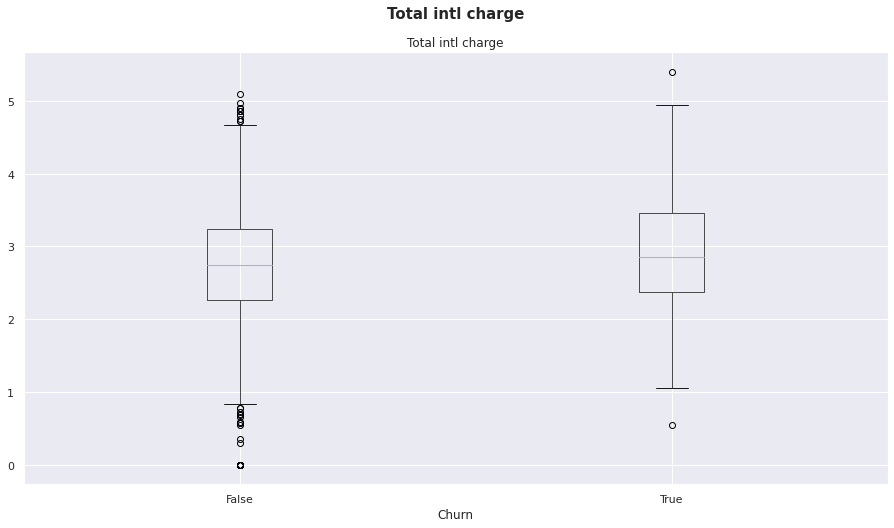

In [96]:
#To plot the "Total intl charge" vs "Churn" in boxplot
fig=plt.figure(figsize=(10,8))
telecom_df.boxplot(column="Total intl charge", by="Churn")
plt.suptitle("Total intl charge", fontsize=15, fontweight="bold")
plt.plot()

# **CONCLUSION:**

# **After performing exploratory data analysis on the data set, this is what I have incurred from data:**


*   **There are some states where the churn rate is high as compared to the others may be due to low network coverage.**
*   **In the voice mail section when there are more than twenty voice mail messages then there is a churn so it is basically means that quality of voice mail is not good.**
*   **Area code and Account length do not play any kind of key role regarding the churn rate. so, it is redundant data columns.**
*   **In the international calls data shows that the churn rate of those customers is high, those who take the international plan so it means that in international call charges are high also there is a call drop due to poor connectivity.**
*   **In customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't  resolve the customer issues.**
*   **In the international plan those customers who have this plan are churn more and also the international calling charges are alsso high so the customer who has the plan unsatisfied with network issues and high call charges.**
*   **Total day call minutes, Total day calls, Total day charge, Total eve call minutes, Total eve calls, Total eve charge, Total night call minutes, Total night calls, Total night charge these columns are not plays any kind role with the Churn.**

# ***RECCOMENDATIONS:***

*   **Decrese the charges.**
*   **Improve network connectivity.** 
*   **Improve the customer satisfaction by resolving there issues.**
*   **Improve the voice quality of voice mail messages and also decrese the charges or else provide some discounts to the customers.**